# LFW dataset Frontal-view

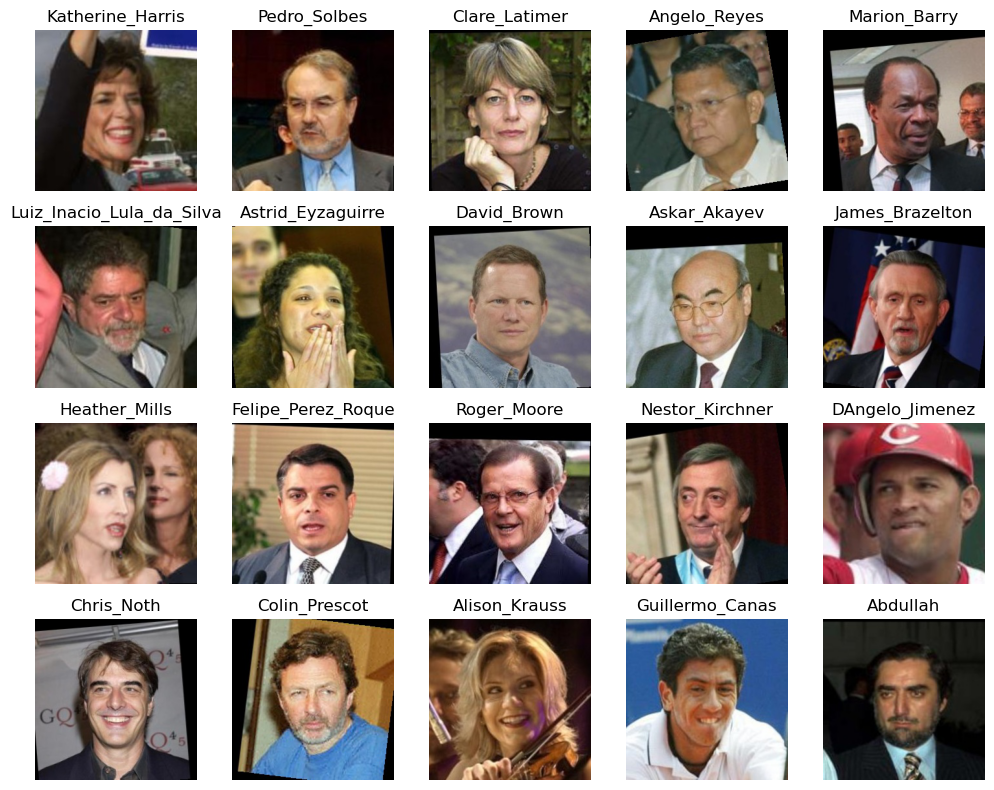

In [1]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the directory containing the dataset
lfw_funneled_path = 'lfw_funneled'

# Get the list of subdirectories in the dataset directory (each subdirectory corresponds to a person)
person_dirs = [os.path.join(lfw_funneled_path, name) for name in os.listdir(lfw_funneled_path) if os.path.isdir(os.path.join(lfw_funneled_path, name))]

# Set the number of images to plot
num_images = 20

# Create a new figure with multiple subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))

# Iterate over the first num_images images and plot them on the corresponding subplots
for i in range(num_images):
    # Select a random person from the dataset
    person_dir = random.choice(person_dirs)

    # Get the list of image filenames for the selected person
    image_filenames = [filename for filename in os.listdir(person_dir) if filename.endswith('.jpg')]

    # Select a random image from the list
    filename = random.choice(image_filenames)
    image_path = os.path.join(person_dir, filename)

    # Load the image using Pillow
    img = Image.open(image_path)

    # Plot the image on the corresponding subplot
    row = i // 5
    col = i % 5
    axes[row, col].imshow(img)
    axes[row, col].set_title(os.path.basename(person_dir))
    axes[row, col].axis('off')

# Adjust the spacing of the figure
fig.tight_layout()

# Show the figure
plt.show()


In [5]:
import cv2

# Load image
img = cv2.imread('/home/nice/Workspace/Research/lfw_funneled/Aaron_Guiel/Aaron_Guiel_0001.jpg')

# Load the pre-trained classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Detect the face
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Crop the face
for (x,y,w,h) in faces:
    face = img[y:y+h, x:x+w]
    cv2.waitKey(0)
    cv2.imwrite(f'lfw_cropped_face/{x}_{y}.jpg', face)


## Detect faces and croping

In [25]:
import cv2
import os

# Path to the folder containing the LFW dataset
path = "lfw_funneled"
output_path = "lfw_cropped_face"

# Loop through all the person subfolders in the LFW dataset folder
for person_folder in os.listdir(path):
    person_path = os.path.join(path, person_folder)
    if os.path.isdir(person_path):
        # Loop through all the image files in the person subfolder
        for filename in os.listdir(person_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                # Read the image file
                image = cv2.imread(os.path.join(person_path, filename))

                # Convert the image to grayscale
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Detect faces 
                face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
                faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)

                # Crop the face(s) and save as a new file
                for (x,y,w,h) in faces:
                    cropped_image = image[y:y+h, x:x+w]
                    cropped_filename = f"{person_folder}_{filename}"
                    cv2.imwrite(os.path.join(f'{output_path}', cropped_filename), cropped_image)


## ploting data

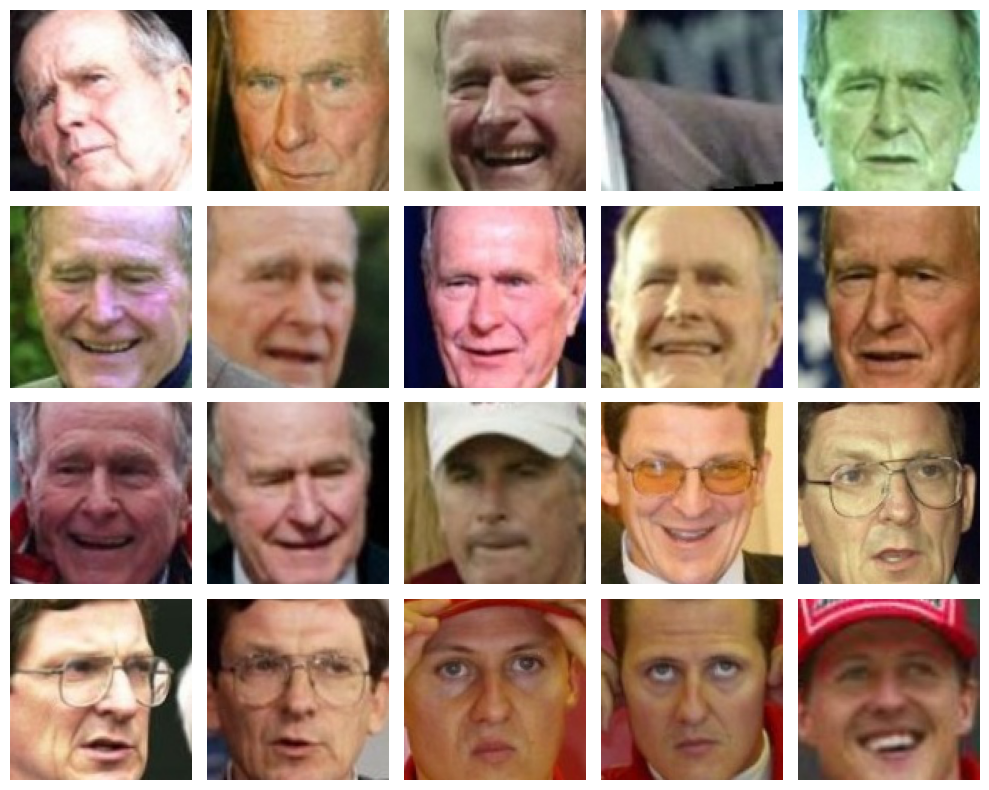

In [28]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Set the path to the dataset
dataset_path = 'lfw_cropped_face'

# Get the list of image filenames
image_filenames = os.listdir(dataset_path)

# Set the number of images to plot
num_images = 20

# Create a new figure with multiple subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))

# Iterate over the first num_images filenames and plot the corresponding images
for i, filename in enumerate(image_filenames[:num_images]):
    # Load the image
    img_path = os.path.join(dataset_path, filename)
    img = Image.open(img_path)

    # Convert the image to a numpy array
    img_arr = np.asarray(img)

    # Plot the image on the corresponding subplot
    row = i // 5
    col = i % 5
    axes[row, col].imshow(img_arr, cmap='gray')
    axes[row, col].axis('off')

# Adjust the spacing of the figure
fig.tight_layout()

# Show the figure
plt.show()
